In [ ]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root = '', train = True, transform = transforms.ToTensor(), download = True)

100%|██████████| 26421880/26421880 [00:02<00:00, 10861638.66it/s]


Extracting FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209831.08it/s]


Extracting FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3933809.45it/s]


Extracting FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6490014.12it/s]

Extracting FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw



In [ ]:
test_dataset = torchvision.datasets.FashionMNIST(root = '', train = False, transform = transforms.ToTensor(), download = True)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 100, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 100, shuffle = False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


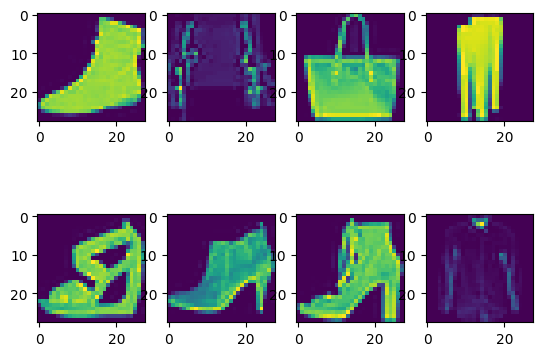

In [ ]:
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.imshow(samples[i][0], cmap = 'viridis')

plt.show()

**The Task:**


1.   You are given 60000 tranining images of dimensions 28x28. The testing dataset size is 10000.
2.   Each of the image shows a category of dress. There are 10 categories.
3.   Your job is to flatten the images from 28x28 to 1x784. Then perform softmax regression on this dataset.
4.   Since, there are k = 784 features and c = 10 classes, define the following weights:

>> $w_{1,1}, w_{2,1}, ..... w_{784, 1}$

>> $w_{1,2}, w_{2,2}, ..... w_{784, 2}$

>> ..........

>> $w_{1,10}, w_{2,10}, ..... w_{784, 10}$

and for each of the classes define a bias:

>> $b_{1}, b_{2}, ...., b_{10}$

5.   One row for each category and each row has a weight $w_{j, c}$ for pixel number $j$ after flattening and for class number $c$.

6.   The number of epochs will be 20. In each epoch, divide the training data into 600 batches each batch having 100 images. This is already done for you in the above code.

7.   For each of the 600 batches, flatten the images. If you don't know how to access a particular batch of images and their corresponding label or if you don't know how to flatten the batches of images, use the following code:

>>>> for i, (images, labels) in enumerate(train_loader):

>>>>>>images = images.reshape(-1, 28*28)

8.   If you want to access any particular image in a batch, just write images[i]. That will give you the i'th image from a batch.

9.   Each image is now an array of 784 integers. For each of these images, calculate 10 scores for 10 categories:

>>>> $s_{1} = w_{1, 1} x_{1} + w_{2, 1} x_{2} + .... + w_{784, 1} x_{784} + b_{1}$

>>>> $s_{2} = w_{1, 2} x_{1} + w_{2, 2} x_{2} + .... + w_{784, 2} x_{784} + b_{2}$

>>>> .........

>>>> $s_{10} = w_{1, 10} x_{1} + w_{2, 10} x_{2} + .... + w_{784, 10} x_{784} + b_{10}$

10.   For each batch of image, the weight update rule for each of the weights is given as follows:

>>>> $w_{j, k} = w_{j, k} - \lambda ( \sum_{i = 1}^{m} (\frac{e^{s_{k}}}{\sum_{l = 1}^{10} e^{s_{l}}} - y_{k}) x_{j})$

11.   The bias update rule is as follows:

>>>> $b_{k} = b_{k} - \lambda ( \sum_{i = 1}^{m} (\frac{e^{s_{k}}}{\sum_{l = 1}^{10} e^{s_{l}}} - y_{k}))$

where m = batch size

12.   After doing the above for the specified number of iterations, make predictions for the images in the test set. Then calculate the accuracy in percentage and print it.

13. During the testing phase, for each image, calculate 10 scores $s_{1}, s_{2}, ..., s_{10}$. One for each category. In order to make a prediction calculate the softmax probabilities for these scores. Then see in which category the softmax score comes the biggest. Choose that class as your prediction.

In [ ]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdim=True)

weights = torch.randn(784, 10, requires_grad=True)
biases = torch.randn(10, requires_grad=True)

learning_rate = 0.1
epochs = 20
batch_size = 100

# loop for 20 epochs:
for epoch in range(epochs):
  for i, (images, labels) in enumerate(train_loader): # batch loop
    images = images.reshape(-1, 28*28)  #contains 100 images per batch with dimension 1*784
    scores = torch.matmul(images, weights) + biases
    probabilities = softmax(scores)
    loss = -torch.log(probabilities[range(images.shape[0]), labels]).mean()
    loss.backward()
    with torch.no_grad():
      weights -= learning_rate * weights.grad
      biases -= learning_rate * biases.grad
      weights.grad.zero_()
      biases.grad.zero_()

correct = 0
total = 0

with torch.no_grad():
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28)
    scores = torch.matmul(images, weights) + biases
    predictions = scores.argmax(dim=1)
    correct += (predictions == labels).sum().item()
    total += labels.size(0)

accuracy = correct / total * 100
print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

Accuracy of the model on the test set: 80.75%
